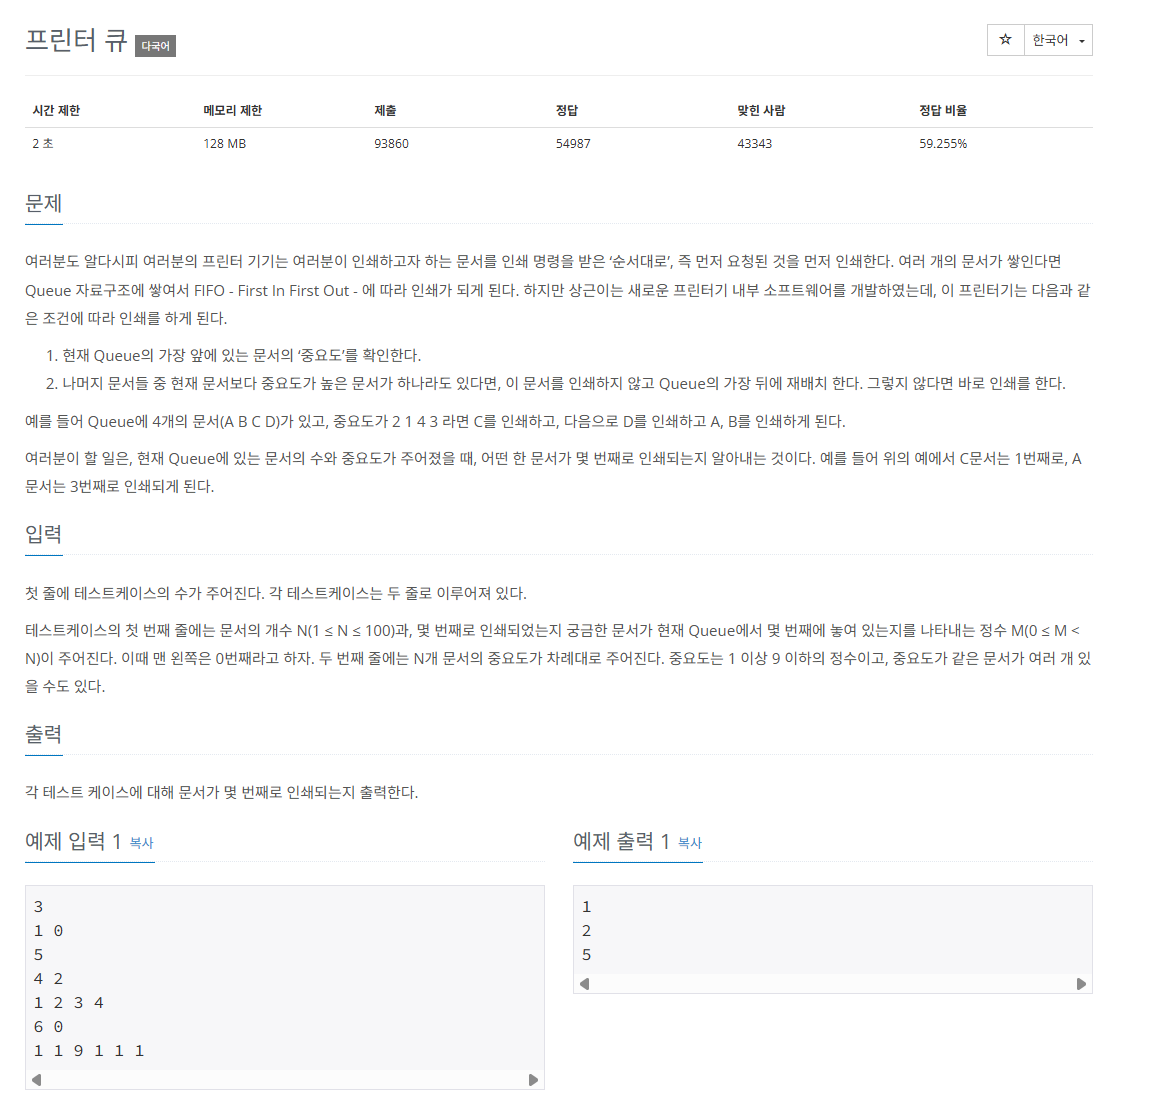

In [ ]:
from PIL import Image
img=Image.open(r'C:\Users\Son\Pictures\Screenshots\스크린샷 2025-07-26 065051.png')

In [ ]:
import sys
# input=sys.stdin.readline

while(input()):
    sentence=input()
    numcount=0
    blankcount=0
    capcount=0
    lowcount=0
    
    for comp in sentence:
        if comp.isnumeric():
            numcount+=1
        elif comp==' ':
            blankcount+=1
        elif comp.isalpha():
            if comp.islower():
                lowcount+=1
            else:
                capcount+=1
    print(lowcount,capcount,numcount,blankcount)

In [ ]:
from collections import deque
import sys

for _ in range(int(input())):
    N,M =map(int,input().split())
    importance_list=list(map(int,input().split()))
    dq=deque()
    for idx,val in enumerate(importance_list):
        dq.append((idx,val))

    count=1

    while(dq):
        if dq[0][1]==max(importance_list):
            if dq[0][0]==M:
                break
            else:
                importance_list.remove(dq.popleft()[1])
                count+=1
            
        else:
            dq.rotate(-1)

    print(count)





1
2
5



-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 5.0 / 5.0 점**

      * **평가:** **완벽한 정답입니다.** 문제의 모든 요구사항을 정확히 이해하고, `deque`와 튜플을 조합하여 복잡한 상태(원래 위치, 중요도)를 추적하는 시뮬레이션을 훌륭하게 구현했습니다. 특히 '남아있는 문서 중 최대 중요도'를 확인하는 핵심 로직을 해결한 것은 이 문제의 가장 큰 장벽을 넘었다는 의미입니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 완벽한 로직과 기능적으로 완전히 동일합니다. 다만, '최대 중요도 확인' 로직을 파이썬의 제너레이터 표현식(generator expression)과 `any()` 함수를 사용해 조금 더 간결하고 Pythonic하게 표현한 버전입니다.

-----

### \#\# Gemini 추천 코드

```python
import sys
from collections import deque

# 테스트 케이스의 수
T = int(sys.stdin.readline())

for _ in range(T):
    N, M = map(int, sys.stdin.readline().split())
    # (원래 인덱스, 중요도) 튜플을 deque에 저장
    dq = deque([(idx, val) for idx, val in enumerate(map(int, sys.stdin.readline().split()))])
    
    print_count = 0
    
    while dq:
        # 1. 큐의 맨 앞에서 문서를 꺼냄
        current_doc = dq.popleft()
        
        # 2. 큐에 남아있는 문서들 중에 더 중요한 것이 있는지 확인
        #    any()는 하나라도 True가 있으면 즉시 멈추므로 효율적
        if any(current_doc[1] < other_doc[1] for other_doc in dq):
            # 있다면, 현재 문서를 맨 뒤로 보냄
            dq.append(current_doc)
        else:
            # 없다면, 이 문서를 인쇄함
            print_count += 1
            # 만약 이 문서가 내가 찾던 문서라면, 정답을 출력하고 종료
            if current_doc[0] == M:
                print(print_count)
                break
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **매우 훌륭합니다.** 큐의 FIFO 동작과 문제의 '중요도에 따른 우선순위' 규칙을 결합한 시뮬레이션은 이 문제에 대한 정석적인 접근법입니다. `deque`를 사용하여 `popleft`와 `append`를 모두 O(1)에 처리한 것은 최적의 선택입니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

  * **내 풀이:** `enumerate`를 사용하여 인덱스와 값을 동시에 가져오고, 이를 튜플로 묶어 `deque`에 저장한 것은 매우 Pythonic하고 훌륭한 코드입니다.
  * **배울 점:** 추천 코드의 `if any(current_doc[1] < other_doc[1] for other_doc in dq):` 부분을 눈여겨보세요.
      * `(current_doc[1] < other_doc[1] for other_doc in dq)`는 `dq`를 순회하며 조건에 맞는 `True` 또는 `False`를 하나씩 만들어내는 제너레이터입니다.
      * `any()` 함수는 이 제너레이터로부터 값을 하나씩 받다가, 단 하나라도 `True`를 만나면 즉시 `True`를 반환하고 멈춥니다. 이는 `for` 루프를 돌며 `max()` 값을 계속 찾는 것보다 더 효율적일 수 있으며, 코드의 의도를 "더 중요한 게 하나라도 있는가?"라고 명확하게 표현해 줍니다.

-----

### \#\# 3. 또 다른 측면: 시간 복잡도와 성능의 트레이드오프

이번에 논의해 볼 주제는 \*\*'알고리즘의 시간 복잡도 분석'\*\*입니다.

  * **사용자님의 풀이 (그리고 추천 코드)의 시간 복잡도:**

      * `while` 루프는 최대 N번 반복됩니다.
      * 루프 안에서 가장 비싼 연산은 `any(...)` 또는 `max()`를 통해 나머지 큐를 확인하는 부분입니다. 이 연산은 큐에 남은 요소의 수만큼, 즉 최악의 경우 약 O(N)의 시간이 걸립니다.
      * 따라서 전체 시간 복잡도는 \*\*O(N²)\*\*이 됩니다.

  * **왜 괜찮은가?:** 이 문제에서는 N의 최댓값이 100입니다. N²은 10,000 정도이므로, 시간 제한 내에 충분히 통과할 수 있습니다. 따라서 이 풀이는 이 문제에 대한 **정답이자 좋은 풀이**입니다.

  * **만약 N이 100,000이었다면?:**

      * O(N²) 알고리즘은 시간 초과가 났을 겁니다.
      * 그럴 때는 '남아있는 문서 중 최대 중요도'를 O(N)이 아닌, 더 빠른 O(1)이나 O(log N)으로 찾아야 합니다. 이를 위해서는 큐와는 별개로, 중요도 값들을 \*\*최대 힙(Max Heap)\*\*이나 정렬된 리스트 같은 추가적인 자료구조로 관리하는 더 복잡한 접근이 필요했을 겁니다.

이처럼 문제의 제약 조건(N \<= 100)을 보고 "아, O(N²)까지는 괜찮겠구나"라고 판단하여 그에 맞는 적절한 복잡도의 알고리즘을 설계하는 능력이 바로 코딩 테스트의 핵심 역량 중 하나입니다.

In [2]:
import platform
import psutil
import cpuinfo
import subprocess
import shutil

def get_cpu_info():
    info = cpuinfo.get_cpu_info()
    return info['brand_raw']

def get_ram_info():
    ram = psutil.virtual_memory()
    return round(ram.total / (1024**3), 2)

def get_os_info():
    return f"{platform.system()} {platform.release()} ({platform.version()})"

def get_architecture():
    return platform.machine()

def get_core_info():
    logical = psutil.cpu_count(logical=True)
    physical = psutil.cpu_count(logical=False)
    return logical, physical

def get_gpu_info():
    if shutil.which("nvidia-smi"):
        try:
            output = subprocess.check_output("nvidia-smi --query-gpu=name,memory.total --format=csv,noheader", shell=True)
            gpus = output.decode().strip().split('\n')
            return [gpu.strip() for gpu in gpus]
        except Exception as e:
            return [f"Error retrieving NVIDIA GPU info: {e}"]
    else:
        return ["NVIDIA GPU not detected or 'nvidia-smi' not installed."]

# 출력
print("===== SYSTEM INFORMATION =====")
print(f"CPU: {get_cpu_info()}")
print(f"Total RAM: {get_ram_info()} GB")
print(f"OS: {get_os_info()}")
print(f"Architecture: {get_architecture()}")

logical, physical = get_core_info()
print(f"Logical Cores: {logical}")
print(f"Physical Cores: {physical}")

print("\n===== GPU INFORMATION =====")
for i, gpu in enumerate(get_gpu_info(), 1):
    print(f"GPU {i}: {gpu}")


===== SYSTEM INFORMATION =====
CPU: AMD Ryzen 5 7430U with Radeon Graphics
Total RAM: 13.84 GB
OS: Windows 11 (10.0.26100)
Architecture: AMD64
Logical Cores: 12
Physical Cores: 6

===== GPU INFORMATION =====
GPU 1: NVIDIA GPU not detected or 'nvidia-smi' not installed.
